## FORECASTING EXCHANGE RATES USING TIME SERIES ANALYSIS

#### Data Preparation and Exploration

In [3]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [5]:
df=pd.read_csv(r"C:\Users\akhil\Documents\AKHIL\Data Science\Assignments\TIME SEREIS\Timeseries\exchange_rate.csv")
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [6]:
df.shape

(7588, 2)

In [7]:
df.columns

Index(['date', 'Ex_rate'], dtype='object')

we have 7588 rows and 2 columns 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [10]:
# let's convert date from object to datetime format
df['date'] = df['date'].apply(lambda x: x.split(" ")[0])     #retaining only date (still in objec) 
df['date'] = pd.to_datetime(df['date'], dayfirst=True)       # object to datetime format (only date)

In [11]:
df

,date,Ex_rate
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7583,2010-10-06,0.718494
7584,2010-10-07,0.721839
7585,2010-10-08,0.723197
7586,2010-10-09,0.720825


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


#### Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

In [14]:
#Let's set the date as index for plotting 
df.set_index('date', inplace=True)

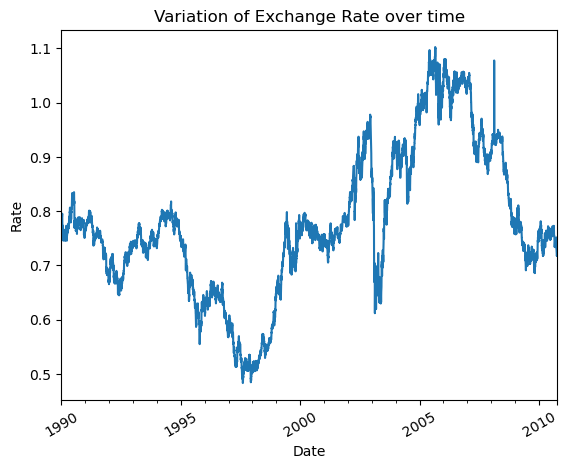

In [15]:
# Plotting time series for currency 
df['Ex_rate'].plot()
plt.title("Variation of Exchange Rate over time")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.xticks(rotation=30)
plt.show()

We can see that there are so much of noise and there is no proper trend as well as seasonality in the given data set and here there are sudden spike in the exchange rate around 2006th year.

#### 3.	Data Preprocessing: Handle any missing values or anomalies identified during the exploration phase.

In [18]:
df.isnull().sum()

Ex_rate    0
dtype: int64

there are no missing values so no need to handle it

In [20]:
### Part 2: Model Building - ARIMA

2.	Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.
3.	Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.
4.	Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.


SyntaxError: invalid syntax (3708397634.py, line 3)

#### 1. Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

In [ ]:
# A function to perform ADFULLER TEST

from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    #performing adfuller test 
    dftest=adfuller(dataset, autolag='AIC')

    #Printing the result
    print("1. ADF :",dftest[0])
    print("2. P-value:",dftest[1])
    print("3. Num of Lags",dftest[2])
    print("4. Num of Observation used for ADF Regression and Critical Values Calculation:",dftest[3])
    print("5. Critical values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [ ]:
ad_test(df['Ex_rate'])

• We can see the series is not stationary at all we need to perform first difference to make it stable.

• p value greater than 0.05 and ADF close to 0 suggest the series is not stationary

In [ ]:
# Performing first difference to get stationary series 
diff_rate = df['Ex_rate'].diff() # perform first difference
diff_rate.dropna(inplace=True)   #removing the first row since it contains null value

In [ ]:
diff_rate

In [ ]:
ad_test(diff_rate)

• Now our series is stable.

• Now we can plot ACF and PACF to help identify initial values for p, d and q

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize = (12, 6))

#plotting acf plot
plt.subplot(1, 2, 1)
plot_acf(diff_rate, lags=40, ax=plt.gca())
plt.title("ACF Plot")

#plot pacf
plt.subplot(1, 2, 2)
plot_pacf(diff_rate, lags=40, ax=plt.gca())
plt.title("PACF Plot")

plt.tight_layout()
plt.show()


• From above plots we can choose, p=1 and q = 1

• d = 1 since the data became stationary after just first difference

#### Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [ ]:

# splitting the data for training and testing

train = df.iloc[:-30]
test = df.iloc[-30:]

train.shape, test.shape

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

#fitting the ARIMA model
arima_model = ARIMA(train, order=(1, 1, 1))    #(order = (p=1,d=1,q=1))
arima_model_res = arima_model.fit()

#Display the summary of the fitted model
print(arima_model_res.summary())

#### Diagnostics: Analyze the residuals to ensure there are no patterns that might indicate model inadequacies.

In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

#plot residuals
residuals = arima_model_res.resid
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(residuals)
plt.title("Residuals")

plt.subplot(2, 1, 2)
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")

plt.tight_layout()
plt.show()

In [ ]:
# Perform Ljung-Box test for autocorrelation
lb_test = acorr_ljungbox(residuals, lags = [10], return_df=True)
print("Ljung-Box Test Results :\n", lb_test)
print()

#perform adfuller test
# model = ad_test(residuals)
ad_test(residuals)

#### Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [ ]:
# Forecast the last 30 days of the dataset

#predictng the values from the above built model
arima_forecasted = arima_model_res.forecast(30)

# Plot only the last 30 days
plt.figure(figsize=(12, 6))
plt.plot(test, label="Exchange Rate", color='blue', marker='o')
plt.plot(arima_forecasted, label="ARMIA Forecasted Exchange Rate", linestyle='dashed', color='red', marker='x')
plt.title("ARIMA Forecast vs Actual (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(arima_forecasted, test))
print(rmse)

### Model Building - Exponential Smoothing

#### Model Selection: Depending on the time series characteristics, choose an appropriate Exponential Smoothing model (Simple, Holt’s Linear, or Holt-Winters).

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#Model Building 
smooth_model = SimpleExpSmoothing(train)
smooth_model = smooth_model.fit(smoothing_level=0.2, optimized=True)

In [ ]:
# Forecast the last 30 days of the dataset

#Getting the forecasted values
forecasted_smooth = smooth_model.forecast(30)

# Plot only the last 30 days
plt.figure(figsize=(12, 6))
plt.plot(test, label="Actual Exchange Rate", color='blue', marker='o')
plt.plot(forecasted_smooth, label="Smooth Model Predicted Exchange Rate", linestyle='dashed', color='red', marker='x')
plt.title("SES Model Predicted vs Actual")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

#### Parameter Optimization: Use techniques such as grid search or AIC to find the optimal parameters for the smoothing levels and components.

In [ ]:
# Finding the best parameters using AIC technique.

# Define a range of smoothing levels to test
alpha_values = np.linspace(0.01, 1, 50)          # 50 values between 0.01 and 1

# Dictionary to store AIC values
aic_scores = {}

# Grid search for optimal smoothing level
for alpha in alpha_values:
    model = SimpleExpSmoothing(train).fit(smoothing_level=alpha, optimized=False)
    aic_scores[alpha] = model.aic

# Find the best alpha with minimum AIC
best_alpha = min(aic_scores, key=aic_scores.get)
best_aic = aic_scores[best_alpha]

best_alpha, best_aic

#### Model Fitting and Forecasting: Fit the chosen Exponential Smoothing model and forecast future values. Compare these forecasts visually with the actual data.

In [ ]:
#Fitting model with best parameters

best_model = SimpleExpSmoothing(train)
best_model = best_model.fit(smoothing_level=best_alpha, optimized=False)

In [ ]:
# Forecast the last 30 days of the dataset

# Getting the forcasted values
best_forecasted = best_model.forecast(30)

# Plot only the last 30 days
plt.figure(figsize=(12, 6))
plt.plot(test, label="Actual Exchange Rate", color='blue', marker='o')
plt.plot(best_forecasted, label="Forecasted Exchange Rate", linestyle='dashed', color='red', marker='x')
plt.title("SES Best Model Forecast vs Actual (Last 30 Days)")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

### Evaluation and Comparison

1. Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts from both models. (i.e ARIMA and Exponential Smoothening Model)

2. Model Comparison: Discuss the performance, advantages, and limitations of each model based on the observed results and error metrics.

3. Conclusion: Summarize the findings and provide insights on which model(s) yielded the best performance for forecasting exchange rates in this dataset.

In [ ]:
# function to compute errors
from sklearn.metrics import mean_absolute_error, mean_squared_error
def compute_errors(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = np.mean(np.abs((actual - predicted)/actual))*100
    return mae, rmse, mape

In [ ]:
# Let's compute the metrics of ARIMA Model
mae1, rmse1, mape1 = compute_errors(np.array(arima_forecasted), np.array(test))
print("---ARIMA MODEL---")
print("Mean Absolute Error :", mae1)
print("Root Mean Square Error :", rmse1)
print("Mean Absolute Percentage Error :", mape1)

In [ ]:
# Let's compute the metrics of ARIMA Model
mae2, rmse2, mape2 = compute_errors(best_forecasted.values, test.values)
print("---Best Exponential Smoothing Model---")
print("Mean Absolute Error :", mae2)
print("Root Mean Square Error :", rmse2)
print("Mean Absolute Percentage Error :", mape2)

• From above we can infer that both models are performing almost the same but Exponential Smoothing Model is slightly better than ARIMA model.

### Comparison of ARIMA and SES

• Performance:

Arima Performs well if the data has patterns, trends or seasonality. In this case it is permerming slightly lerrer since there is no trends or seasonality in the dataset

SES performs best for stationary data. In this case the data is stationary so it permorms better

• Accuracy (For this use case):

Arima has slightly less MAPA score (1.8132007198628202)

SES performs slightly better MAPA Score (1.8123812805513204)

• Adaptability:

ARIMA can capture trens and autocorrelation but needs fine tuning (In this case p=1,d=1,q=1)

SES reacts quickly for short term changes

• Complexity:

Arima is more

SES lesser comparatively

•Forecasting Capabilities:

Arima is best for medium to long term

SES is best for short term forecasting

#### In Conclusion

• SES is better for exchange rate forecasting because.

    data is stationary (no trend/seasonality).
    
    short-term forecasting and yields a reactive models.
    
• In our case the performance of ARIMA and SES was almost similar so we should go with SES model since it is faster and less complex